## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

# Adam, Epoch 加到 500

In [5]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 24s 479us/step - loss: 1.9493 - accuracy: 0.2960 - val_loss: 1.8033 - val_accuracy: 0.3529
Epoch 2/500
50000/50000 [==============================] - 23s 453us/step - loss: 1.7283 - accuracy: 0.3826 - val_loss: 1.6928 - val_accuracy: 0.3979
Epoch 3/500
50000/50000 [==============================] - 24s 483us/step - loss: 1.6350 - accuracy: 0.4163 - val_loss: 1.5886 - val_accuracy: 0.4290
Epoch 4/500
50000/50000 [==============================] - 23s 456us/step - loss: 1.5663 - accuracy: 0.4411 - val_loss: 1.5492 - val_accuracy: 0.4473
Epoch 5/500
50000/50000 [==============================] - 24s 471us/step - loss: 1.5078 - accuracy: 0.4624 - val_loss: 1.5189 - val_accuracy: 0.4624
Epoch 6/500
50000/50000 [==============================] - 34s 674us/step - loss: 1.4808 - accuracy: 0.4726 - val_loss: 1.4938 - val_accuracy: 0.4649
Epoch 7/500
50000/50000 [=========================

Epoch 55/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.6140 - accuracy: 0.7830 - val_loss: 1.8441 - val_accuracy: 0.5182
Epoch 56/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.6148 - accuracy: 0.7804 - val_loss: 1.9329 - val_accuracy: 0.5138
Epoch 57/500
50000/50000 [==============================] - 21s 425us/step - loss: 0.5985 - accuracy: 0.7870 - val_loss: 1.9338 - val_accuracy: 0.5124
Epoch 58/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.5850 - accuracy: 0.7921 - val_loss: 1.8881 - val_accuracy: 0.5193
Epoch 59/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.5776 - accuracy: 0.7947 - val_loss: 1.9508 - val_accuracy: 0.5169
Epoch 60/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.5573 - accuracy: 0.8038 - val_loss: 1.9499 - val_accuracy: 0.5127
Epoch 61/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.5706 - ac

50000/50000 [==============================] - 21s 418us/step - loss: 0.2745 - accuracy: 0.9016 - val_loss: 3.3625 - val_accuracy: 0.4982
Epoch 110/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.2826 - accuracy: 0.8992 - val_loss: 3.3863 - val_accuracy: 0.4969
Epoch 111/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.2937 - accuracy: 0.8949 - val_loss: 3.4052 - val_accuracy: 0.4971
Epoch 112/500
50000/50000 [==============================] - 21s 420us/step - loss: 0.2630 - accuracy: 0.9060 - val_loss: 3.4806 - val_accuracy: 0.4949
Epoch 113/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.2940 - accuracy: 0.8954 - val_loss: 3.5088 - val_accuracy: 0.4953
Epoch 114/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.2781 - accuracy: 0.8996 - val_loss: 3.5692 - val_accuracy: 0.4982
Epoch 115/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.2568 - accuracy:

Epoch 163/500
50000/50000 [==============================] - 21s 420us/step - loss: 0.2125 - accuracy: 0.9248 - val_loss: 4.7502 - val_accuracy: 0.4880
Epoch 164/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.2337 - accuracy: 0.9189 - val_loss: 4.7875 - val_accuracy: 0.4907
Epoch 165/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.1641 - accuracy: 0.9424 - val_loss: 4.8340 - val_accuracy: 0.4952
Epoch 166/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.1525 - accuracy: 0.9449 - val_loss: 4.8432 - val_accuracy: 0.4937
Epoch 167/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.1417 - accuracy: 0.9494 - val_loss: 4.7743 - val_accuracy: 0.4898
Epoch 168/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.2263 - accuracy: 0.9202 - val_loss: 4.9127 - val_accuracy: 0.4884
Epoch 169/500
50000/50000 [==============================] - 21s 422us/step - loss: 0.18

Epoch 217/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.1444 - accuracy: 0.9506 - val_loss: 5.4455 - val_accuracy: 0.4978
Epoch 218/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.0902 - accuracy: 0.9686 - val_loss: 5.6948 - val_accuracy: 0.4891
Epoch 219/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.1462 - accuracy: 0.9498 - val_loss: 5.5842 - val_accuracy: 0.4911
Epoch 220/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.1754 - accuracy: 0.9386 - val_loss: 5.6363 - val_accuracy: 0.4878
Epoch 221/500
50000/50000 [==============================] - 23s 460us/step - loss: 0.1329 - accuracy: 0.9539 - val_loss: 5.5241 - val_accuracy: 0.4896
Epoch 222/500
50000/50000 [==============================] - 21s 430us/step - loss: 0.1125 - accuracy: 0.9603 - val_loss: 5.6129 - val_accuracy: 0.4908
Epoch 223/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.13

50000/50000 [==============================] - 21s 426us/step - loss: 0.0962 - accuracy: 0.9669 - val_loss: 6.0329 - val_accuracy: 0.4879
Epoch 271/500
50000/50000 [==============================] - 21s 414us/step - loss: 0.1322 - accuracy: 0.9552 - val_loss: 6.2519 - val_accuracy: 0.4940
Epoch 272/500
50000/50000 [==============================] - 21s 414us/step - loss: 0.1459 - accuracy: 0.9509 - val_loss: 6.4018 - val_accuracy: 0.4883
Epoch 273/500
50000/50000 [==============================] - 21s 415us/step - loss: 0.1135 - accuracy: 0.9620 - val_loss: 6.3768 - val_accuracy: 0.4936
Epoch 274/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.0981 - accuracy: 0.9664 - val_loss: 6.7996 - val_accuracy: 0.4811
Epoch 275/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.1920 - accuracy: 0.9369 - val_loss: 6.4544 - val_accuracy: 0.4821
Epoch 276/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.1457 - accuracy:

Epoch 324/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.0887 - accuracy: 0.9696 - val_loss: 6.6045 - val_accuracy: 0.4945
Epoch 325/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.0417 - accuracy: 0.9865 - val_loss: 6.8538 - val_accuracy: 0.4951
Epoch 326/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.1255 - accuracy: 0.9589 - val_loss: 6.8474 - val_accuracy: 0.4857
Epoch 327/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.2156 - accuracy: 0.9332 - val_loss: 6.6967 - val_accuracy: 0.4885
Epoch 328/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.1363 - accuracy: 0.9551 - val_loss: 6.7262 - val_accuracy: 0.4959
Epoch 329/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.0633 - accuracy: 0.9777 - val_loss: 6.8913 - val_accuracy: 0.4975
Epoch 330/500
50000/50000 [==============================] - 21s 419us/step - loss: 0.05

Epoch 378/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.2346 - accuracy: 0.9315 - val_loss: 7.2222 - val_accuracy: 0.4839
Epoch 379/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.1732 - accuracy: 0.9453 - val_loss: 7.2205 - val_accuracy: 0.4937
Epoch 380/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.0871 - accuracy: 0.9706 - val_loss: 6.9379 - val_accuracy: 0.4886
Epoch 381/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.0367 - accuracy: 0.9881 - val_loss: 7.2866 - val_accuracy: 0.4927
Epoch 382/500
50000/50000 [==============================] - 21s 420us/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 7.4257 - val_accuracy: 0.4926
Epoch 383/500
50000/50000 [==============================] - 21s 418us/step - loss: 0.0618 - accuracy: 0.9797 - val_loss: 7.1477 - val_accuracy: 0.4868
Epoch 384/500
50000/50000 [==============================] - 21s 422us/step - loss: 0.25

Epoch 432/500
50000/50000 [==============================] - 21s 415us/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 7.3553 - val_accuracy: 0.4945
Epoch 433/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.1137 - accuracy: 0.9653 - val_loss: 7.4037 - val_accuracy: 0.4836
Epoch 434/500
50000/50000 [==============================] - 21s 416us/step - loss: 0.2090 - accuracy: 0.9386 - val_loss: 7.2480 - val_accuracy: 0.4863
Epoch 435/500
50000/50000 [==============================] - 21s 421us/step - loss: 0.1220 - accuracy: 0.9607 - val_loss: 7.2708 - val_accuracy: 0.4924
Epoch 436/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.0494 - accuracy: 0.9837 - val_loss: 7.2266 - val_accuracy: 0.4958
Epoch 437/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 7.3630 - val_accuracy: 0.4923
Epoch 438/500
50000/50000 [==============================] - 21s 424us/step - loss: 0.02

Epoch 486/500
50000/50000 [==============================] - 22s 447us/step - loss: 0.0810 - accuracy: 0.9726 - val_loss: 6.8584 - val_accuracy: 0.4904
Epoch 487/500
50000/50000 [==============================] - 22s 446us/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 6.9234 - val_accuracy: 0.4967
Epoch 488/500
50000/50000 [==============================] - 24s 480us/step - loss: 0.0153 - accuracy: 0.9968 - val_loss: 6.9814 - val_accuracy: 0.4950
Epoch 489/500
50000/50000 [==============================] - 22s 431us/step - loss: 0.0151 - accuracy: 0.9962 - val_loss: 6.9508 - val_accuracy: 0.4975
Epoch 490/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 7.1520 - val_accuracy: 0.5019
Epoch 491/500
50000/50000 [==============================] - 21s 423us/step - loss: 0.0051 - accuracy: 0.9994 - val_loss: 7.2841 - val_accuracy: 0.5030
Epoch 492/500
50000/50000 [==============================] - 21s 417us/step - loss: 0.00

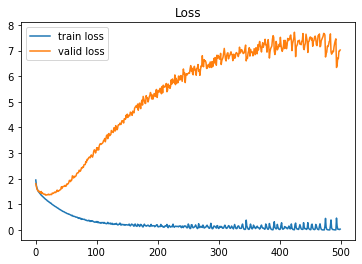

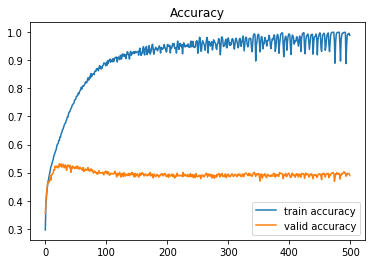

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# SGD, Epoch 500

In [9]:
model = build_mlp()

In [10]:
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 16s 326us/step - loss: 2.2809 - accuracy: 0.1314 - val_loss: 2.2316 - val_accuracy: 0.1954
Epoch 2/500
50000/50000 [==============================] - 17s 349us/step - loss: 2.1986 - accuracy: 0.2172 - val_loss: 2.1695 - val_accuracy: 0.2377
Epoch 3/500
35328/50000 [====================>.........] - ETA: 6s - loss: 2.1491 - accuracy: 0.2450

KeyboardInterrupt: 

In [ ]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()